In [1]:
import sys
sys.path.append("../")


from scipy.sparse.csgraph import reverse_cuthill_mckee
from sklearn.metrics import pairwise_distances, pairwise
from scipy.sparse import csr_matrix
import matplotlib.gridspec as gridspec

import os
import math
import time
import numpy as np
import pandas as pd
from collections import Counter
import random

import torch
import torch_geometric
from torch.utils.data.dataset import Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import scipy.io
from numpy.lib.stride_tricks import as_strided

In [2]:
!python --version

Python 3.8.8


In [3]:
os.listdir("/home/kumarv/renga016/Public/sst_dataset_old/")

['sst.day.mean.1986.nc',
 'sst.day.mean.1982.nc',
 'sst.day.mean.1985.nc',
 'sst.day.mean.1983.nc',
 'sst.day.mean.1984.nc',
 'sst.day.mean.1987.nc']

In [4]:
os.listdir("/home/kumarv/renga016/Public/sst_dataset")

['sst.day.mean.2018.nc',
 'sst.day.mean.1987.nc',
 'sst.day.mean.2013.nc',
 'sst.day.mean.2010.nc',
 'sst.day.mean.2004.nc',
 'sst.day.mean.1982.nc',
 'sst.day.mean.2021.nc',
 'sst.day.mean.2007.nc',
 'sst.day.mean.2003.nc',
 'sst.day.mean.1985.nc',
 'sst.day.mean.1983.nc',
 'sst.day.mean.2020.nc',
 'sst.day.mean.2012.nc',
 'sst.day.mean.2009.nc',
 'sst.day.mean.2014.nc',
 'sst.day.mean.2005.nc',
 'sst.day.mean.2008.nc',
 'sst.day.mean.1991.nc',
 'sst.day.mean.1988.nc',
 'sst.day.mean.1999.nc',
 'sst.day.mean.2006.nc',
 'sst.day.mean.2022.nc',
 'sst.day.mean.2011.nc',
 'sst.day.mean.2019.nc',
 'sst.day.mean.2017.nc',
 'sst.day.mean.2002.nc',
 'sst.day.mean.1984.nc',
 'sst.day.mean.1990.nc',
 'sst.day.mean.1989.nc',
 'sst.day.mean.1994.nc',
 'sst.day.mean.2000.nc',
 'sst.day.mean.1986.nc',
 'sst.day.mean.1996.nc',
 'sst.day.mean.1998.nc',
 'sst.day.mean.1997.nc',
 'sst.day.mean.1995.nc',
 'sst.day.mean.2015.nc',
 'sst.day.mean.2016.nc',
 'sst.day.mean.2023.nc',
 'sst.day.mean.1992.nc',


In [5]:
import xarray
data = xarray.open_mfdataset("/home/kumarv/renga016/Public/sst_dataset/*.nc",engine = "netcdf4", parallel=True)

In [26]:
data

<xarray.Dataset>
Dimensions:  (time: 14324, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2023-03-20
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(365, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    history:        Thu Aug 24 13:35:47 2017: ncatted -O -a References,global...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [6]:
# data_numpy = data.sst.values
# np.save("sst/sst_all_years_all_regions.npy", data_numpy)

In [7]:
# data_sst = data.sst[:,410:510,990:990+180].values

In [8]:

initial_x = 410
initial_y = 990
data_sst = data.sst[:,initial_x:initial_x+100,initial_y:initial_y+180].values
nanflag = ~np.isnan(data_sst[0])
data_sst[np.isnan(data_sst)] = 0
np.savez("sst/sst_all_years_gulf_mexico.npz", dataset=data_sst, nanset=nanflag)


In [9]:
initial_x = 380
initial_y = 120
data_sst = data.sst[:,initial_x:initial_x+100,initial_y:initial_y+180].values
nanflag = ~np.isnan(data_sst[0])
data_sst[np.isnan(data_sst)] = 0
np.savez("sst/sst_all_years_persiangulf.npz", dataset=data_sst, nanset=nanflag)

In [10]:
initial_x = 360
initial_y = 310
data_sst = data.sst[:,initial_x:initial_x+100,initial_y:initial_y+180].values
nanflag = ~np.isnan(data_sst[0])
data_sst[np.isnan(data_sst)] = 0
np.savez("sst/sst_all_years_southeast_asia.npz", dataset=data_sst, nanset=nanflag)

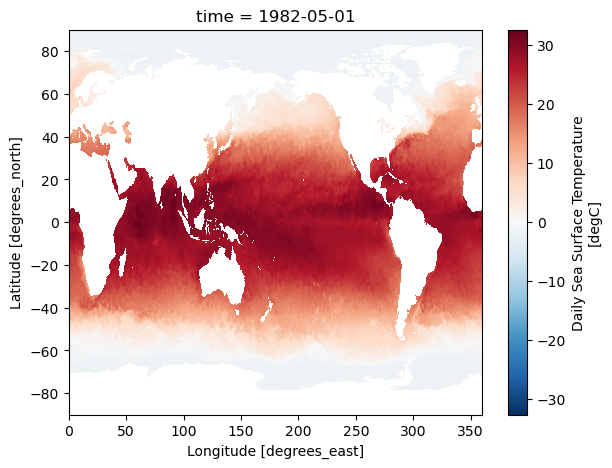

In [32]:
air2d = data.sst.isel(time=120)

air2d.plot(aspect="auto",size = 5)

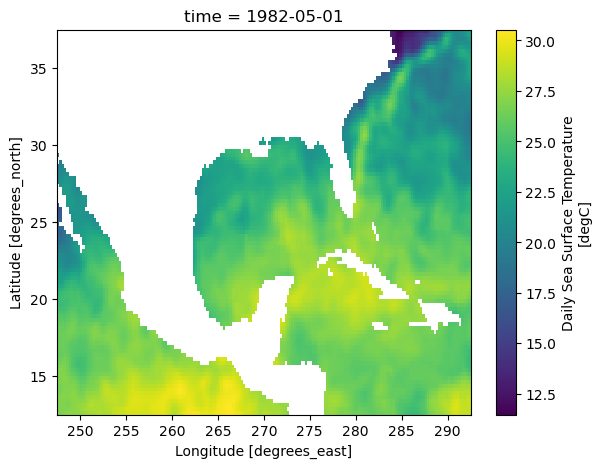

In [10]:
air2d = data.sst[:,410:510,990:990+180].isel(time=120)

air2d.plot(aspect="auto",size = 5)

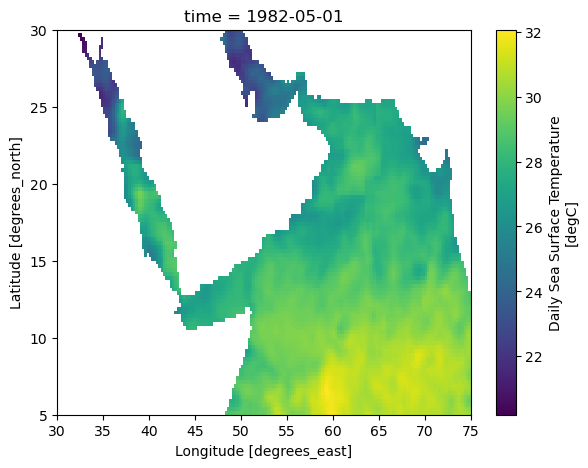

In [15]:
initial_x = 380
initial_y = 120
air2d = data.sst[:,initial_x:initial_x+100,initial_y:initial_y+180].isel(time=120)

air2d.plot(aspect="auto",size = 5)

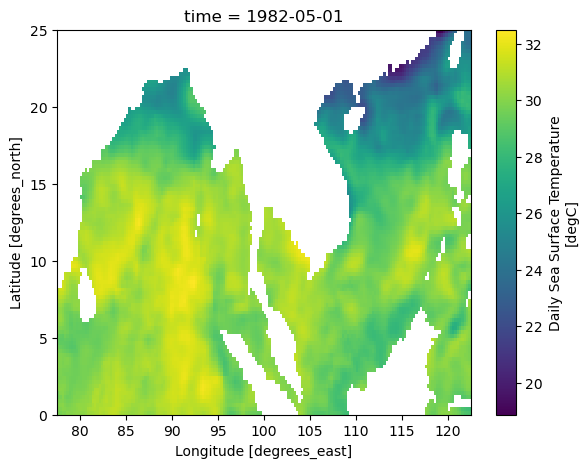

In [18]:
initial_x = 360
initial_y = 310
air2d = data.sst[:,initial_x:initial_x+100,initial_y:initial_y+180].isel(time=120)

air2d.plot(aspect="auto",size = 5)

In [10]:
nanflag = ~np.isnan(data_sst[0])

In [11]:
nanflag

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [12]:
np.nanmin(data_sst)

1.23

In [13]:
data_sst[np.isnan(data_sst)] = 0

In [14]:
np.max(data_sst)

33.399998

In [15]:
np.argmax(data_sst,axis=0)

array([[ 283,  283,  283, ..., 2052, 2052, 2052],
       [ 283,  678,  283, ..., 2052, 2052, 2052],
       [ 215,  677, 1705, ...,  548,  549, 2052],
       ...,
       [   0,    0,    0, ...,  946,  195,  196],
       [   0,    0,    0, ...,  194,  615,  201],
       [   0,    0,    0, ...,  606,  203,  203]])

/tmp/ipykernel_2785902/257209988.py:13: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(fraction=0.046, pad=0.04)


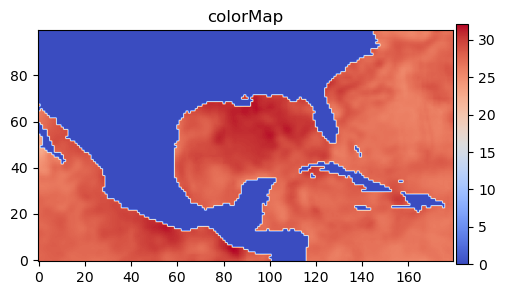

In [16]:
fig = plt.figure(figsize=(6, 3))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(data_sst[210],origin='lower',cmap='coolwarm')
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

In [17]:
nanflag.shape

(100, 180)

In [18]:
np.save("sst/sst_gulf_mexico_82_87.npy", data_sst)
np.save("sst/sst_gulf_mexico_82_87_nanflag.npy",nanflag)

In [19]:
#CHANGE BELOW DEPENDING ON FOLDER

In [7]:
seed = 0

In [32]:
import scipy.io
mat = scipy.io.loadmat('results/results_det_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))

FileNotFoundError: [Errno 2] No such file or directory: 'results/results_det_sst_alpha6_bottle_10_seed_0/snapshots_pred.mat'

In [ ]:
mat.keys()

In [ ]:
mat['pred'].shape

In [ ]:
fig = plt.figure(figsize=(6, 3))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
data = mat['pred'][150]
data[~nanflag] = np.nan

plt.imshow(data,origin='lower',cmap='coolwarm',vmin=-1, vmax=1)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 3))

ax = fig.add_subplot(111)
ax.set_title('colorMap')

data = mat['truth'][150]
data[~nanflag] = np.nan

plt.imshow(data,origin='lower',cmap='coolwarm',vmin=-1, vmax=1)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6, 3))

ax = fig.add_subplot(111)
ax.set_title('colorMap')

data = mat['init']
data[~nanflag] = np.nan

plt.imshow(data,origin='lower',cmap='coolwarm',vmin=-1, vmax=1)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

In [6]:
init = scipy.io.loadmat('results/results_det_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['init']
init[~nanflag] = np.nan

print(np.nanmin(init))
print(np.nanmax(init))

DAE = scipy.io.loadmat('results/results_det_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['pred']
DAE[:,~nanflag] = np.nan

print(np.nanmin(DAE))
print(np.nanmax(DAE))

koopmanAE = scipy.io.loadmat('results/results_det_back_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['pred']
koopmanAE[:,~nanflag] = np.nan

print(np.nanmin(koopmanAE))
print(np.nanmax(koopmanAE))

koopmanAE_INN = scipy.io.loadmat('results/results_det_back_inn_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['pred']
koopmanAE_INN[:,~nanflag] = np.nan

print(np.nanmin(koopmanAE_INN))
print(np.nanmax(koopmanAE_INN))


truth = scipy.io.loadmat('results/results_det_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['truth']
truth[:,~nanflag] = np.nan

print(np.nanmin(truth))
print(np.nanmax(truth))

vmax= max( np.nanmax(init),np.nanmax(DAE),np.nanmax(koopmanAE),np.nanmax(koopmanAE_INN),np.nanmax(truth))
vmin= min( np.nanmin(init),np.nanmin(DAE),np.nanmin(koopmanAE),np.nanmin(koopmanAE_INN),np.nanmin(truth))


print(vmin)
print(vmax)





# create a figure with 5 x 5 subplots
fig, axes = plt.subplots(5, 5, figsize=(30, 15))


# get a 1-dimensional list of axis objects
ax_list = list(axes.flat)[::-1]
num_subplots = len(ax_list)

for i in range(int(num_subplots/5)):
    # generate random y values and plot this series
    ax = ax_list.pop()
    ax.imshow(init,origin='lower',cmap='coolwarm',vmin=vmin, vmax=vmax)
    ax.set_title("Initial")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(DAE[35*(i+1)],origin='lower',cmap='coolwarm',vmin=vmin, vmax=vmax)
    ax.set_title("DAE")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(koopmanAE[35*(i+1)],origin='lower',cmap='coolwarm',vmin=vmin, vmax=vmax)
    ax.set_title("koopmanAE")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(koopmanAE_INN[35*(i+1)],origin='lower',cmap='coolwarm',vmin=vmin, vmax=vmax)
    ax.set_title("koopmanAE_inn")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(truth[35*(i+1)],origin='lower',cmap='coolwarm',vmin=vmin, vmax=vmax)
    ax.set_title("truth")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
# display the figure


fig.tight_layout()
plt.show()

NameError: name 'seed' is not defined

In [7]:
init = scipy.io.loadmat('results/results_det_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['init']
init[~nanflag] = np.nan

# print(np.nanmin(init))
# print(np.nanmax(init))


truth = scipy.io.loadmat('results/results_det_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['truth']
truth[:,~nanflag] = np.nan




# print(np.nanmin(truth))
# print(np.nanmax(truth))



DAE = scipy.io.loadmat('results/results_det_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['pred']
DAE[:,~nanflag] = np.nan
DAE = DAE - truth 
print("DAE",np.nanmean(np.abs(DAE)))

# print(np.nanmin(DAE))
# print(np.nanmax(DAE))

koopmanAE = scipy.io.loadmat('results/results_det_back_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['pred']
koopmanAE[:,~nanflag] = np.nan
koopmanAE = koopmanAE - truth 
print("koopmanAE",np.nanmean(np.abs(koopmanAE)))


# print(np.nanmin(koopmanAE))
# print(np.nanmax(koopmanAE))

koopmanAE_INN = scipy.io.loadmat('results/results_det_back_inn_sst_alpha6_bottle_10_seed_{}/snapshots_pred.mat'.format(seed))['pred']
koopmanAE_INN[:,~nanflag] = np.nan
koopmanAE_INN = koopmanAE_INN - truth 
print("koopmanAE_INN",np.nanmean(np.abs(koopmanAE_INN)))



# print(np.nanmin(koopmanAE_INN))
# print(np.nanmax(koopmanAE_INN))


# print(np.nanmin(X_prev))
# print(np.nanmax(X_prev))



vmax= max( np.nanmax(init),np.nanmax(DAE),np.nanmax(koopmanAE),np.nanmax(koopmanAE_INN),np.nanmax(truth))
vmin= min( np.nanmin(init),np.nanmin(DAE),np.nanmin(koopmanAE),np.nanmin(koopmanAE_INN),np.nanmin(truth))

vabs = max(abs(vmax),abs(vmin))


# print(vmin)
# print(vmax)


truth = truth -truth
print("truth",np.nanmean(np.abs(truth)))



# create a figure with 5 x 5 subplots
fig, axes = plt.subplots(5, 5, figsize=(30, 15))


# get a 1-dimensional list of axis objects
ax_list = list(axes.flat)[::-1]
num_subplots = len(ax_list)

for i in range(int(num_subplots/5)):
    # generate random y values and plot this series
    ax = ax_list.pop()
    ax.imshow(init,origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
    ax.set_title("Initial")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(DAE[35*(i+1)],origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
    ax.set_title("DAE")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(koopmanAE[35*(i+1)],origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
    ax.set_title("koopmanAE")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(koopmanAE_INN[35*(i+1)],origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
    ax.set_title("koopmanAE_inn")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(truth[35*(i+1)],origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
    ax.set_title("truth")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    

    
# display the figure

fig.tight_layout()
plt.show()

NameError: name 'seed' is not defined

In [8]:

def calculate_mse(array1, array2):
    # Calculate the squared difference between the arrays
    squared_diff = np.square(array1 - array2)

    # Calculate the mean along all elements of the squared difference
    mse = np.mean(squared_diff)

    return mse




nanflag = np.load('sst/sst_sst_omri_nanflag.npy')


init =  scipy.io.loadmat('results/trailrun1/26220/KIA/snapshots_pred.mat')['init']
init[~nanflag] = np.nan

# print(np.nanmin(init))
# print(np.nanmax(init))


truth = scipy.io.loadmat('results/trailrun1/26220/KIA/snapshots_pred.mat')['truth']
truth[:,~nanflag] = np.nan




DAE = scipy.io.loadmat('results/trailrun1/26220/DAE/snapshots_pred.mat')['pred']
DAE[:,~nanflag] = np.nan

print("DAE MSE", calculate_mse(DAE, truth))

koopmanAE_INN = scipy.io.loadmat('results/trailrun1/26220/KIA/snapshots_pred.mat')['pred']
koopmanAE_INN[:,~nanflag] = np.nan


print("KIA MSE", calculate_mse(koopmanAE_INN, truth))







vmax= max( np.nanmax(init),np.nanmax(DAE),np.nanmax(koopmanAE_INN),np.nanmax(truth))
vmin= min( np.nanmin(init),np.nanmin(DAE),np.nanmin(koopmanAE_INN),np.nanmin(truth))

vabs = max(abs(vmax),abs(vmin))


# print(vmin)
# print(vmax)


# truth = truth -truth
# print("truth",np.nanmean(np.abs(truth)))



# create a figure with 5 x 5 subplots
fig, axes = plt.subplots(5, 4, figsize=(30, 15))


# get a 1-dimensional list of axis objects
ax_list = list(axes.flat)[::-1]
num_subplots = len(ax_list)

for i in range(int(num_subplots/4)):
    # generate random y values and plot this series
    ax = ax_list.pop()
    ax.imshow(init,origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
    ax.set_title("Initial")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(DAE[35*(i+1)],origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
    ax.set_title("DAE")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
#     ax = ax_list.pop()
#     ax.imshow(koopmanAE[35*(i+1)],origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
#     ax.set_title("koopmanAE")
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])
#     ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(koopmanAE_INN[35*(i+1)],origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
    ax.set_title("koopmanAE_inn")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    
    ax = ax_list.pop()
    ax.imshow(truth[35*(i+1)],origin='lower',cmap='coolwarm',vmin=-vabs, vmax=vabs)
    ax.set_title("truth")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axis('off')
    

    
# display the figure

fig.tight_layout()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 70

In [43]:
print (DAE.shape)

(180, 70, 150)


In [44]:
print (truth.shape)

(180, 70, 150)


In [65]:
# # Calculate the squared difference between the arrays
# squared_diff = np.square(DAE - truth)

# # Calculate the mean along all elements of the squared difference
# mse = np.nanmean(squared_diff)

# print("MSE:", mse)


def create_overlapping_windows(arr, size, step):
    stride = arr.strides[0]
    nrows = ((arr.size - size) // step) + 1
    return as_strided(arr, shape=(nrows, size), strides=(step*stride, stride))


(210, 100, 180)


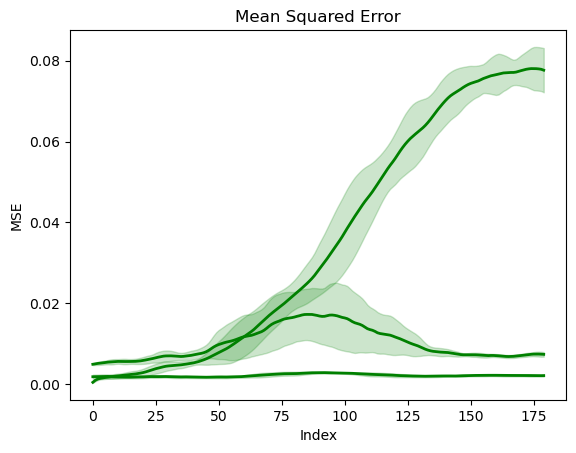

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def createStridedData(data, window, stride):
    print (data.shape)
    strided_data = []
    i=0
    while i<len(data) and i+window<len(data):
        strided_data.append(np.expand_dims(data[i:i+window], axis=1))
        i = i+stride
    strided_data = np.concatenate(strided_data, axis=1)
    strided_data = np.swapaxes(strided_data, 0, 1)

    return strided_data

# Assuming you have two arrays named 'array1' and 'array2' of shape (180, 70, 150)

# Calculate the mean squared error (MSE) for each pair of corresponding elements
mean_pred = np.load('results/trialrun3/21595/KIA/data.npz')
reshaped_array = createStridedData(mean_pred["Avg_Prediction"], 180, 1)

init =  scipy.io.loadmat('results/trialrun3/21595/KIA/snapshots_pred.mat')
init_points = np.expand_dims(init['init'],axis=1)
persistence = np.repeat(init_points,180,axis=1)

mae_norm = np.zeros((init['pred'].shape[0:2]))

mse_values1 = np.mean((init['pred'] - init['truth'])**2, axis=(2, 3)) 
std_val = np.std(mse_values1, axis=0)
mean_val = np.mean(mse_values1, axis=0)

mse_values2 = np.mean((reshaped_array - init['truth'])**2, axis=(2, 3)) 
std_val_2 = np.std(mse_values2, axis=0)
mean_val_2 = np.mean(mse_values2, axis=0)

# mse_values2 = np.mean((init['truth'][0] - init['truth'])**2, axis=(2, 3)) 
# std_val_2 = np.std(mse_values2, axis=0)
# mean_val_2 = np.mean(mse_values2, axis=0)

mse_values3 = np.mean((persistence - init['truth'])**2, axis=(2, 3)) 
std_val_3 = np.std(mse_values3, axis=0)
mean_val_3 = np.mean(mse_values3, axis=0)

    

plt.plot(mean_val, '-', lw=2, label="KIA", color='#008000')
plt.fill_between(x=range(mean_val.shape[0]), y1=mean_val - std_val, y2=mean_val + std_val, color='#008000', alpha=0.2)


plt.plot(mean_val_2, '-', lw=2, label="Mean", color='#008000')
plt.fill_between(x=range(mean_val_2.shape[0]), y1=mean_val_2 - std_val_2, y2=mean_val_2 + std_val_2, color='#008000', alpha=0.2)


plt.plot(mean_val_3, '-', lw=2, label="Persistence", color='#008000')
plt.fill_between(x=range(mean_val_3.shape[0]), y1=mean_val_3 - std_val_3, y2=mean_val_3 + std_val_3, color='#008000', alpha=0.2)

# Plot the MSE values
# plt.plot(std_val)

# plt.plot(mse_values2)
plt.xlabel('Index')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.show()


[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


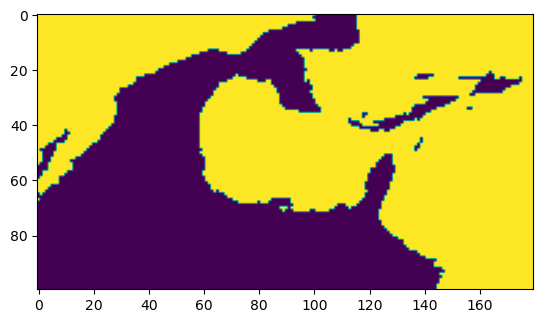

In [52]:
nanflag = np.load('sst/sst_gulf_mexico_82_87_nanflag.npy')
print (nanflag)
plt.imshow(nanflag)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

def createStridedData(data, window, stride):
    strided_data = [np.expand_dims(data[i:i+window], axis=1) for i in range(0, len(data) - window, stride)]
    return np.swapaxes(np.concatenate(strided_data, axis=1), 0, 1)

# Load Data
mean_pred = np.load('results/results_det_back_inn_sst_alpha6_bottle_10_steps_14_seed_2/data.npz')
KIA = scipy.io.loadmat('results/results_det_back_inn_sst_alpha6_bottle_10_steps_14_seed_2/snapshots_pred.mat')
# KIA = scipy.io.loadmat('results/trialrun3/KIA2/snapshots_pred.mat')
DAE = scipy.io.loadmat('results/results_det_back_inn_sst_alpha6_bottle_10_steps_14_seed_2/snapshots_pred.mat')

# Process Data
reshaped_array = createStridedData(mean_pred["Avg_Prediction"], 180, 1)
persistence = np.repeat(np.expand_dims(init['init'],axis=1), 180, axis=1)

# Compute MSEs
mse_values = [np.mean(np.abs(rescale(array)[:,:,nanflag] - rescale(KIA['truth'])[:,:,nanflag]), axis=2) for array in [KIA['pred'], DAE['pred'],reshaped_array, persistence]]
mean_values = [np.mean(mse_value, axis=0) for mse_value in mse_values]
std_values = [np.std(mse_value, axis=0) for mse_value in mse_values]

# Plot
labels = ["KIA", "DAE", "Mean", "Persistence"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e41a1c']  # Pick your own colors

for mean_val, std_val, label, color in zip(mean_values, std_values, labels, colors):
    x_range = range(mean_val.shape[0])
    plt.plot(mean_val, '-', lw=2, label=label, color=color)
    plt.fill_between(x=x_range, y1=mean_val - std_val, y2=mean_val + std_val, color=color, alpha=0.2)

plt.xlabel('Index')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.legend(loc='upper left')
plt.show()


NameError: name 'init' is not defined

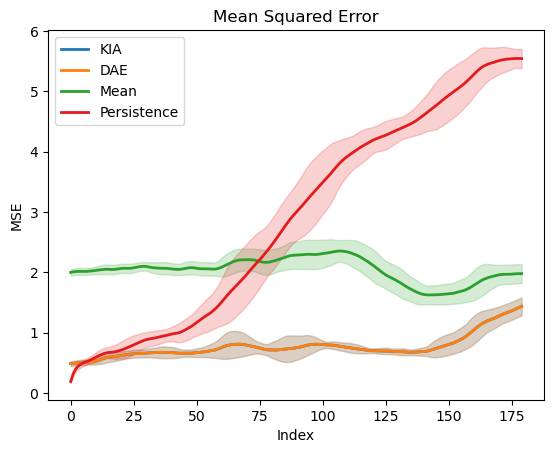

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

nanflag = np.load('sst/sst_all_years_gulf_mexico.npz')['nanset']
def rescale(array):
    mean_pred1 = np.load('results/results_det_back_inn_sst_alpha6_bottle_12_steps_14_seed_1/data.npz')
    orig_mean = mean_pred1['mean']
    orig_min = mean_pred1['min']
    orig_ptp = mean_pred1['ptp']
    return (((((array + 1)*orig_ptp)/2) + orig_min) + orig_mean.reshape(100,180))


def createStridedData(data, window, stride):
    strided_data = [np.expand_dims(data[i:i+window], axis=1) for i in range(0, len(data) - window, stride)]
    return np.swapaxes(np.concatenate(strided_data, axis=1), 0, 1)

# Load Data
mean_pred = np.load('results/results_det_back_inn_sst_alpha6_bottle_12_steps_14_seed_1/data.npz')
KIA = scipy.io.loadmat('results/results_det_back_inn_sst_alpha6_bottle_12_steps_14_seed_1/snapshots_pred.mat')
# KIA = scipy.io.loadmat('results/trialrun3/KIA2/snapshots_pred.mat')

DAE = scipy.io.loadmat('results/results_det_back_inn_sst_alpha6_bottle_12_steps_14_seed_1/snapshots_pred.mat')

# Process Data
reshaped_array = createStridedData(mean_pred["Avg_Prediction"][:210], 180, 1)
persistence = np.repeat(np.expand_dims(KIA['init'],axis=1), 180, axis=1)

# Compute MSEs
mse_values = [np.mean(np.abs(rescale(array)[:,:,nanflag] - rescale(KIA['truth'])[:,:,nanflag]), axis=2) for array in [KIA['pred'], DAE['pred'],reshaped_array, persistence]]
mean_values = [np.mean(mse_value, axis=0) for mse_value in mse_values]
std_values = [np.std(mse_value, axis=0) for mse_value in mse_values]

# Plot
labels = ["KIA", "DAE", "Mean", "Persistence"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e41a1c']  # Pick your own colors

for mean_val, std_val, label, color in zip(mean_values, std_values, labels, colors):
    x_range = range(mean_val.shape[0])
    plt.plot(mean_val, '-', lw=2, label=label, color=color)
    plt.fill_between(x=x_range, y1=mean_val - std_val, y2=mean_val + std_val, color=color, alpha=0.2)

plt.xlabel('Index')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.legend(loc='upper left')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


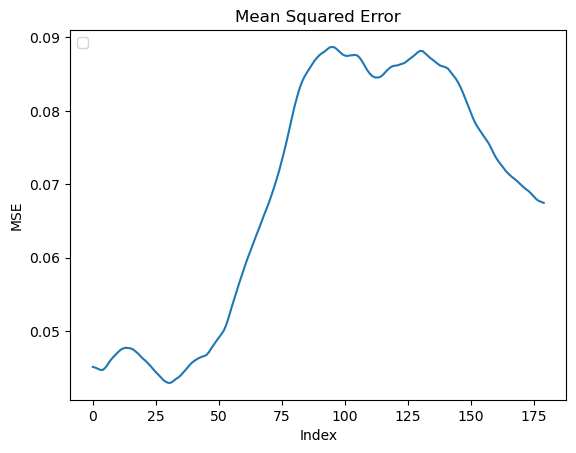

In [36]:
KIA = scipy.io.loadmat('results/results_det_back_inn_sst_alpha6_bottle_10_steps_14_seed_1/snapshots_pred.mat')
mse_values = [np.mean(np.abs((array)[:,:,nanflag] - (KIA['truth'])[:,:,nanflag]), axis=2) for array in [KIA['pred']]]
mean_values = [np.mean(mse_value, axis=0) for mse_value in mse_values]
plt.plot(mean_values[0])
plt.xlabel('Index')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.legend(loc='upper left')
plt.show()

In [16]:
mse_values[0].shape

(30, 180)

In [5]:
mean_pred1 = np.load('results/trialrun3/KIA2/data.npz')
orig_mean = mean_pred1['mean']
orig_min = mean_pred1['min']
orig_ptp = mean_pred1['ptp']
print (orig_mean, orig_min, orig_ptp)

[27.809261 27.828459 27.849457 ... 23.237139 23.221142 23.216705] -21.225492 35.11703


In [7]:
mean_pred1 = np.load('results/trialrun3/21595/KIA2/data.npz')
orig_mean = mean_pred1['mean']
orig_min = mean_pred1['min']
orig_ptp = mean_pred1['ptp']
print (orig_mean, orig_min, orig_ptp)

[27.53734  27.557047 27.582638 ... 22.8879   22.869686 22.892115] -15.655223 28.811394


In [30]:
DAE['pred'].shape

(30, 180, 100, 180)

In [31]:
reshaped_array.shape

(185, 180, 100, 180)

In [32]:
mean_pred["Avg_Prediction"].shape

(365, 100, 180)

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

def createStridedData(data, window, stride):
    strided_data = [np.expand_dims(data[i:i+window], axis=1) for i in range(0, len(data) - window, stride)]
    return np.swapaxes(np.concatenate(strided_data, axis=1), 0, 1)

# Load Data
mean_pred = np.load('results/trialrun3/21595/KIA/data.npz')
KIA = scipy.io.loadmat('results/trialrun3/21595/KIA/snapshots_pred.mat')
DAE = scipy.io.loadmat('results/trialrun3/21595/DAE/snapshots_pred.mat')

# Process Data
reshaped_array = createStridedData(mean_pred["Avg_Prediction"], 180, 1)
persistence = np.repeat(np.expand_dims(init['init'],axis=1), 180, axis=1)

# Compute MSEs
mse_values = [np.mean(np.abs(rescale(array)[:,:,~nanflag] - rescale(KIA['truth'])[:,:,~nanflag]), axis=(2, 3)) for array in [KIA['pred'], DAE['pred'],reshaped_array, persistence]]
mean_values = [np.mean(mse_value, axis=0) for mse_value in mse_values]
std_values = [np.std(mse_value, axis=0) for mse_value in mse_values]

# Plot
labels = ["KIA", "DAE", "Mean", "Persistence"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e41a1c']  # Pick your own colors

for mean_val, std_val, label, color in zip(mean_values, std_values, labels, colors):
    x_range = range(mean_val.shape[0])
    plt.plot(mean_val, '-', lw=2, label=label, color=color)
    plt.fill_between(x=x_range, y1=mean_val - std_val, y2=mean_val + std_val, color=color, alpha=0.2)

plt.xlabel('Index')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.legend(loc='upper left')
plt.show()


In [9]:

init =  scipy.io.loadmat('results/trialrun3/21595/KIA/snapshots_pred.mat')

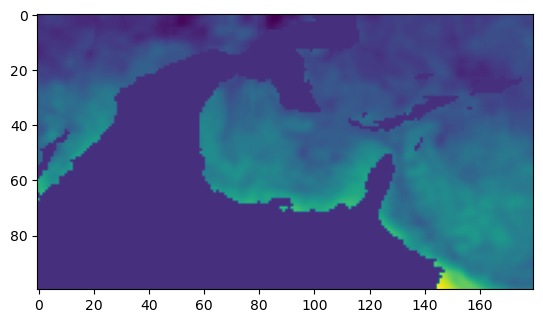

In [13]:
plt.imshow(init['truth'][0][0])

In [62]:
mean_pred["Avg_Prediction"]

(210, 100, 180)

In [83]:


reshaped_array.shape

(210, 100, 180)


(30, 180, 100, 180)

In [81]:
ff_array = np.zeros((30,180,100,180))
data = mean_pred["Avg_Prediction"]
for i in range(30):
    ff_array[i] = data[i:i+180]
